# Simulation plots

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

blip_color = 'blue'
blip_1init_color = 'cornflowerblue'
map_color = 'darkgreen'
minimax_color = 'purple'

In [2]:
import os
import sys

# Figure out directory structure 
file_directory = os.getcwd()

# Replace these directories with wherever you would like to save the plots
file_save_dir = os.path.split(
    os.path.split(os.path.split(file_directory)[0])[0]
)[0] + '/blip_sims/final-plots/'
presentation_save_dir = file_save_dir.replace("final-plots", "presentation_plots")


### 1. Power and FDR

In [3]:
pdf = pd.read_csv("m2_power.csv")
pdf.loc[pdf['count_signals']==0, 'res_power'] = pdf.loc[
    pdf['count_signals']==0, 'res_power'
] * (1 / 100) # units are pixels
pdf['q'] = pdf['q'].astype(float)

In [4]:
pdf.loc[pdf['count_signals']==1].sort_values("res_power")

,method,count_signals,q,power,fdr,res_power,fixed_radius
0,Starnet (MAP),1,1.00,0.072711,0.907429,81.000000,0.000625
1,Starnet (MAP),1,1.00,0.104129,0.867429,116.000000,0.000833
2,Starnet (MAP),1,1.00,0.188510,0.760000,210.000000,0.001250
9,Starnet (MAP),1,1.00,0.205566,0.738286,229.000000,0.020000
3,Starnet (MAP),1,1.00,0.254039,0.676571,283.000000,0.001667
35,Starnet + BLiP,1,0.05,0.461400,0.063752,329.967464,0.000000
4,Starnet (MAP),1,1.00,0.359066,0.542857,400.000000,0.002500
36,Starnet + BLiP,1,0.10,0.511670,0.105181,428.388279,0.000000
5,Starnet (MAP),1,1.00,0.434470,0.446857,484.000000,0.003333
37,Starnet + BLiP,1,0.15,0.529623,0.154728,491.525131,0.000000


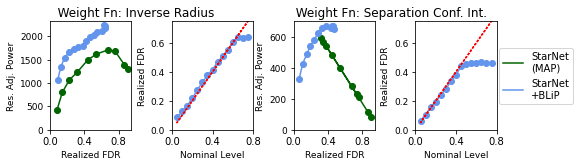

In [5]:
import matplotlib.pyplot as plt

# colors
colors = [map_color, blip_1init_color]
methods = pdf['method'].unique()
qs = pdf.loc[pdf['method'].str.contains('BLiP'), 'q']
method2legend = {'Starnet + BLiP':'StarNet\n+BLiP', 'Starnet (MAP)':'StarNet\n(MAP)'}

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(8,2))

plot_num = 0
for count_signals, xmeas, ymeas, axnum, xtitle, ytitle in zip(
    [0, 0, 1, 1],
    ['fdr', 'q', 'fdr', 'q'],
    ['res_power', 'fdr', 'res_power', 'fdr'],
    [0, 1, 2, 3],
    ['Realized FDR', 'Nominal Level', 'Realized FDR', 'Nominal Level'],
    ['Res. Adj. Power', 'Realized FDR', 'Res. Adj. Power', 'Realized FDR'],
):
    ax = axs[axnum]
    # Loop through methods
    for method, color in zip(methods, colors):
        if xmeas == 'q' and 'BLiP' not in method:
            continue
        subs = pdf.loc[
            (pdf['method'] == method) &
            (pdf['count_signals'] == count_signals)
        ]
        #subs = subs.sort_values("fdr")
        if plot_num == 0:
            subs = subs.loc[~np.isnan(subs['q'])]
        ax.scatter(
            subs[xmeas], subs[ymeas], color=color
        )
        ax.plot(
            subs[xmeas], subs[ymeas], color=color,
            label=method2legend[method]
        )
    # Add x=y FDR line
    if xmeas == 'q':
        ax.plot(qs, qs, color='red', linestyle='dotted')
        ax.set_xlim(right=qs.max())
        ax.set_ylim(top=qs.max())
    if axnum == 0:
        ax.legend(bbox_to_anchor=(6.50,0.8), prop={'size': 10})
        
    # Set ticks, lims, and labels
    ax.set_xlabel(xtitle, size=9)
    ax.set_ylabel(ytitle, size=9)
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_xticks([0, 0.4, 0.8])
    ax.tick_params(axis='y', which='major', labelsize=9)
    plot_num += 1
    

plt.subplots_adjust(wspace=0.50, hspace=None)
plt.suptitle("   Weight Fn: Inverse Radius                     Weight Fn: Separation Conf. Int.")
plt.savefig(
    f"{file_save_dir}/m2/m2_power_fdr.png", 
    dpi=500, 
    bbox_inches='tight',
)
plt.show()
    


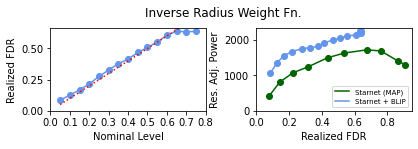

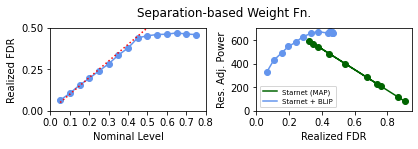

In [6]:
import matplotlib.pyplot as plt

for count_signals, right_x_title, suptitle, wfsave in zip(
    [0, 1],
    ['Res.Adj. Power', 'Res. Adj. Power'],
    ['Inverse Radius Weight Fn.', 'Separation-based Weight Fn.'],
    ['inverse_radius', 'separation']
):
    # Create figure and such
    subpdf = pdf.loc[pdf['count_signals'] == count_signals]
    fig, axs = plt.subplots(ncols=2, figsize=(6,2))
    fig.tight_layout(pad=2)
    methods = sorted(pdf['method'].unique())
    colors = [map_color, blip_1init_color]

    # FDR plot
    for plot_num, ax, xmeas, ymeas, xtitle, ytitle in zip(
        [0, 1],
        [axs[0], axs[1]],
        ['q', 'fdr'],
        ['fdr', 'res_power'],
        ['Nominal Level', 'Realized FDR'],
        ['Realized FDR', 'Res. Adj. Power'],
    ):

        for method, color in zip(methods, colors):
            if plot_num == 0 and 'BLiP' not in method:
                continue
            subs = subpdf.loc[subpdf['method'] == method]
            #subs = subs.sort_values("fdr")
            if plot_num == 0:
                subs = subs.loc[~np.isnan(subs['q'])]
            ax.scatter(
                subs[xmeas], subs[ymeas], color=color
            )
            ax.plot(
                subs[xmeas], subs[ymeas], color=color,
                label=method
            )
            ax.set(xlabel=xtitle, ylabel=ytitle)
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)

    qs = sorted(subpdf['q'].unique())
    axs[0].plot(qs, qs, color='red', linestyle='dotted')
    axs[0].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    axs[0].set_yticks([0, 0.25, 0.5])
    #axs[1].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    
    plt.suptitle(suptitle)
    plt.legend(
        #bbox_to_anchor=(0.7,0.8),
        #loc="upper left",
        prop={'size': 7}
    )
    plt.savefig(
        f"{file_save_dir}/m2/m2_power_fdr_countsignals{count_signals}.png", 
        dpi=500, 
        bbox_inches='tight',
    )
    plt.savefig(
        f"{presentation_save_dir}/m2/m2_power_fdr_{wfsave}.png", 
        dpi=500, 
        bbox_inches='tight',
    )
    plt.show()

### 2. Plot the actual discoveries

In [7]:
methods_to_plot = [
    'MAP', 'BLiP (q=0.05)', 'BLiP (q=0.1)', 'BLiP (q=0.25)'
]

In [8]:
all_ests = pd.read_csv("m2_ests.csv")
all_ests.loc[
    all_ests['method'] == 'Starnet (MAP)', 'radius'
] = 0.5 / 100
true_locs = all_ests.loc[all_ests['method'] == 'Hubble'].copy()
ests = all_ests.loc[
    all_ests['method2'].isin(methods_to_plot)
]

In [8]:
# Add true locations so they'll show up
to_add = []
for method in methods_to_plot:
    df = true_locs.copy()
    df['method2'] = method
    to_add.append(df)
p_ests = pd.concat([ests] + to_add, axis='index')
p_ests.loc[p_ests['method'] == 'Hubble']
p_ests['disc_type'] = p_ests['true_disc'].map({0:'False', 1:'True'})
p_ests['disc_type'] = p_ests.apply(
    lambda r: 'Hubble' if r['method'] == 'Hubble' else r['disc_type'],
    axis='columns'
)

In [43]:
def get_rect_flags(data, lx, ux, ly, uy):
    """
    Subset data to just look at a specific rectangle
    """
    flags = (data['x'] >= lx)
    flags = flags & (data['y'] >= ly)
    flags = flags & (data['x'] <= ux)
    flags = flags & (data['y'] <= uy)
    return flags

In [44]:
p_ests['ymin'] = p_ests['y'] - p_ests['radius']
p_ests['ymax'] = p_ests['y'] + p_ests['radius']
p_ests['xmin'] = p_ests['x'] - p_ests['radius']
p_ests['xmax'] = p_ests['x'] + p_ests['radius']
p_ests['shape'] = p_ests['method'].str.contains('Hubble').astype(str)

In [45]:
# Global parameters
import matplotlib.pyplot as plt
# Good one: lx=0.3, ux=0.5, ly=0.4, uy=0.6
lx = 0.3
ux = 0.5
ly = 0.4
uy = 0.6
#background = 'white'
#breaks = []
hubble_color = 'lightgreen' 
#blip_color = 'cornflowerblue' if background == 'white' else 'green'
subset = p_ests.loc[get_rect_flags(p_ests, lx, ux, ly, uy)].copy()

# Conversion to brightness
max_alpha = 0.9
min_alpha = 0.05
max_radius = subset['radius'].max()
min_radius = subset.loc[subset['method'] != 'Hubble', 'radius'].min()

def calc_alpha(radius):
    alpha = max_alpha
    alpha += (min_radius - radius) / (max_radius - min_radius) * (max_alpha - min_alpha)
    return max(min(max_alpha, alpha), min_alpha)

In [46]:
# Specify which method gets to be part of which subplot
row1m = methods_to_plot[3].split("(")[-1].split(")")[0]
col1m = methods_to_plot[2].split("(")[-1].split(")")[0]
subset['ax_row'] =  (
    subset['method2'].str.contains(row1m) | subset['method2'].str.contains('MAP')
).astype(int)
subset['ax_col'] = (
    subset['method2'].str.contains(col1m) | subset['method2'].str.contains('MAP')
).astype(int)

In [47]:
# Plot hubble discoveries last so they're more visible
subset['priority'] = subset['disc_type'] == 'Hubble'
subset = subset.sort_values('priority')

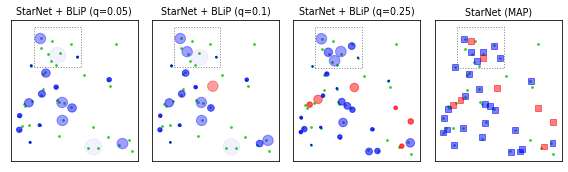

In [48]:
subset2 = subset.copy()
fig, axes = plt.subplots(1, 4, figsize=(8,2.5))
for j in range(subset2.shape[0]):
    row = subset2.iloc[j]
    ax = axes[2*row['ax_row'] + row['ax_col']]
    #axes[row['ax_row'], row['ax_col']]
    disc_type = row['disc_type']
    if disc_type == 'Hubble':
        ax.scatter(
            row['x'], row['y'], color='limegreen', alpha=1, s=3 # 'lightgreen' is prettier but harder to see
        )
    else:
        color = 'blue' if disc_type == 'True' else 'red'
        if row['method2'] == 'MAP':
            region = patches.Rectangle(
                (row['x'] - row['radius'], row['y'] - row['radius']),
                2 * row['radius'], 
                2 * row['radius'],
                edgecolor=color,
                facecolor=color,
                alpha=calc_alpha(np.sqrt(2) * row['radius'])
            )
        else:
            region = patches.Circle(
                (row['x'], row['y']),
                row['radius'], 
                edgecolor=color,
                facecolor=color, 
                alpha=calc_alpha(row['radius'])
            )
        ax.add_patch(region)

# Adjust axes and subtitles
for i in range(4):
    axes[i].set(xticks=(), yticks=())
    
    ### Option 2: doesn't highlight false discoveries for MAP
    #axes[i].add_patch(
    #    patches.Rectangle(
    #        (0.365, 0.470),
    #        0.040,
    #        0.030,
    #        edgecolor='gray',
    #        facecolor='none',
    #        alpha=1,
    #        linestyle='dashed',
    #    )
    #)
    
    ### Option 1
    axes[i].add_patch(
       patches.Rectangle(
           (0.33, 0.55),
           0.080,
           0.070,
           edgecolor='gray',
           facecolor='none',
           alpha=1,
           linestyle='dotted',
       )
    )
    #axes[i].text(0.30, 0.56, 'Exhibit A', rotation=90, size=7)


axes[0].set_title(f'StarNet + BLiP (q=0.05)', size=9.5)
axes[1].set_title(f'StarNet + BLiP ({col1m})', size=9.5)
axes[2].set_title(f'StarNet + BLiP ({row1m})', size=9.5)
axes[3].set_title('StarNet (MAP)', size=9.5)
plt.tight_layout()
plt.savefig(
    f"{file_save_dir}/m2/m2_picture_v2.png", 
    dpi=500, 
    bbox_inches='tight',
)
plt.show()

1. Add annotations in boxes of different colors to show separation of the stars (pick two)

2. One horizontal line of four, instead of a big box